In [1]:
using OITOOLS,PyPlot

┌ Info: Precompiling OITOOLS [58da1ff6-845a-519d-b3ee-ddbcc77dda80]
└ @ Base loading.jl:1260
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Pkg/src/Pkg.jl:531


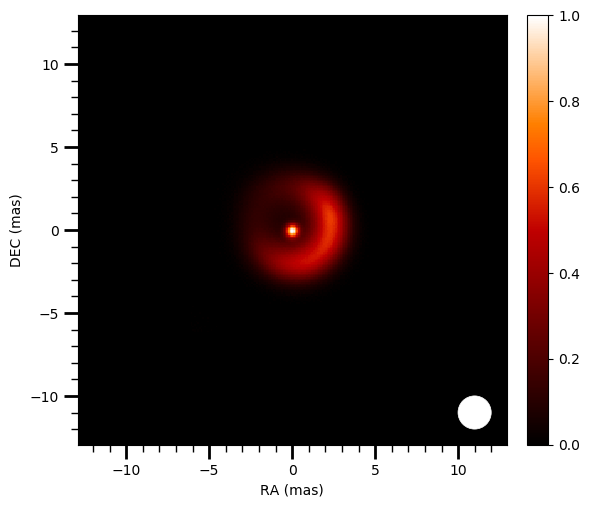

In [2]:
fitsfile = "./data/2004true.fits";
pixsize = 0.101; # in mas/pixel
x_true = readfits(fitsfile); nx = (size(x_true))[1]; x_true=vec(x_true);

# display the image
imdisp(x_true, pixscale = pixsize, tickinterval = 1.0, beamsize = 1.0, beamlocation = [0.85, 0.85], use_colorbar = true)

In [3]:
oifitsfile = "./data/2004-data1.oifits";
data = (readoifits(oifitsfile))[1,1]; # data can be split by wavelength, time, etc.

┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


In [4]:
data.nuv, data.nv2, data.nt3amp, data.nt3phi

(247, 195, 130, 130)

In [5]:
data.uv

2×247 Array{Float64,2}:
      -1.13996e7  -1.1696e7   …   2.1535e7    2.23659e7   2.2812e7
 -831762.0        -2.07369e6     -2.25956e7  -2.02349e7  -1.78056e7

In [6]:
data.v2

195-element Array{Float64,1}:
  0.7173843383789062
  0.6997612118721008
  0.6874377131462097
  0.6793773770332336
  0.6661666035652161
  0.6605017185211182
  0.6575695872306824
  0.6490134000778198
  0.6483098864555359
  0.6418826580047607
  0.6368133425712585
  0.6322910189628601
  0.6242653131484985
  ⋮
  0.0005338648916222155
  0.0008845569682307541
  0.00013056832540314645
  0.0004299974534660578
  0.000293102755676955
  0.000656169664580375
  0.00012252644228283316
  0.0009803363354876637
  0.0003563631616998464
  0.0005742112407460809
 -6.327339360723272e-5
  0.0004951238515786827

In [7]:
data.v2_err

195-element Array{Float64,1}:
 0.0024589060340076685
 0.0024117224384099245
 0.0023986389860510826
 0.0024070627987384796
 0.0023581262212246656
 0.002409725682809949
 0.002344886539503932
 0.0023144858423620462
 0.002360293408855796
 0.002351831877604127
 0.0023314813151955605
 0.0022951627615839243
 0.002311798045411706
 ⋮
 0.0003041979216504842
 0.00031144439708441496
 0.00029241933953016996
 0.0003012586385011673
 0.0002997801057063043
 0.00029902931419201195
 0.00029293709667399526
 0.0003094328276347369
 0.00029870501020923257
 0.0003005625039804727
 0.00029034417821094394
 0.00030232235440053046

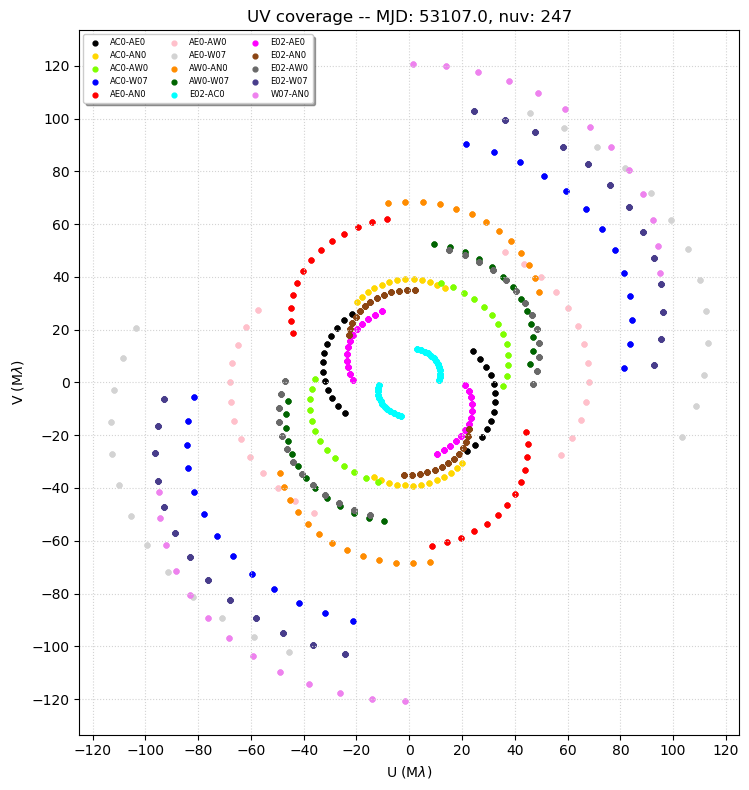

In [8]:
uvplot(data)

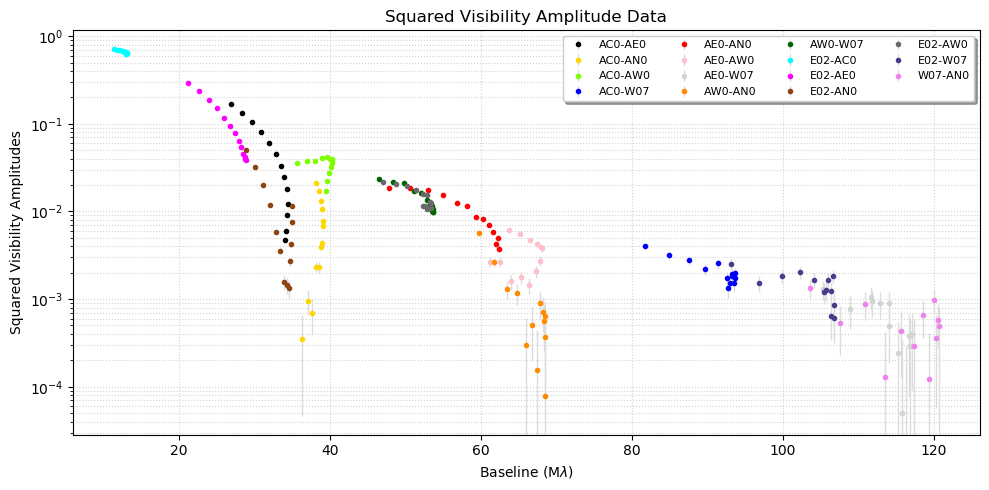

In [9]:
v2plot(data,logplot=true);

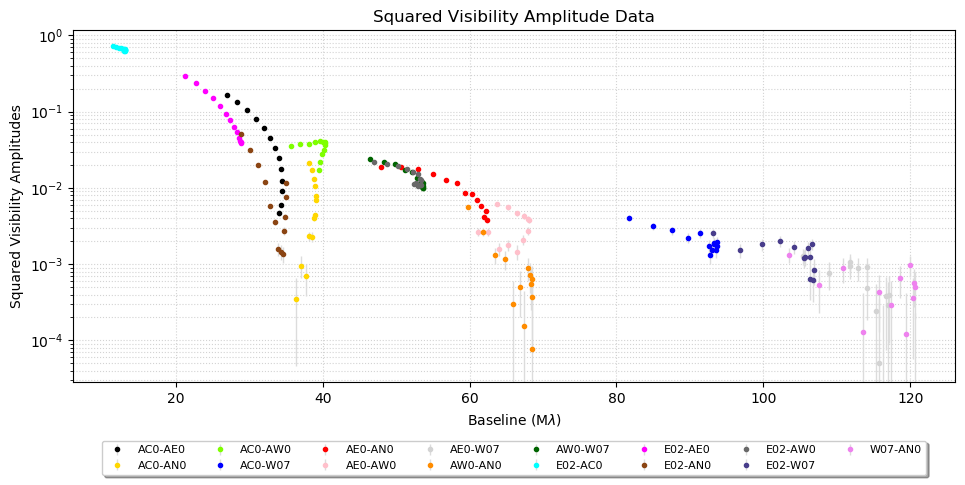

In [10]:
v2plot(data,logplot=true, legend_below=true);

In [4]:
dft = setup_dft(data, nx, pixsize);
chi2 = chi2_dft_f(x_true, dft, data);
cvis_model = image_to_cvis_dft(x_true, dft);
v2_model = cvis_to_v2(cvis_model, data.indx_v2);

Chi2r: 1.6842607705696082 V2: 2.5148441245352244 T3A: 1.2029413925676045 T3P: 0.9197051176231875 Flux: 1.0


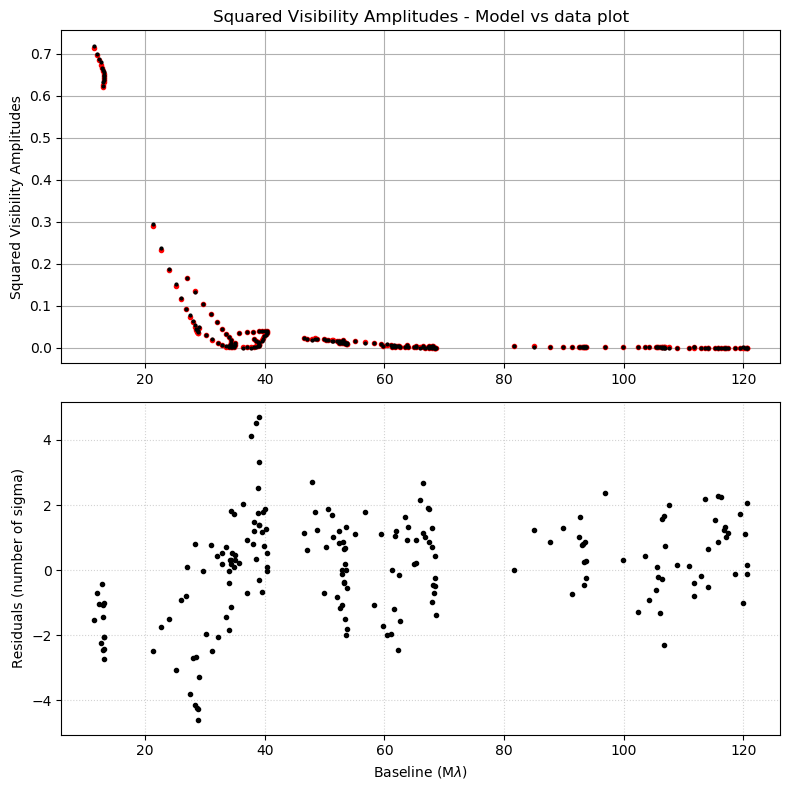

In [5]:
v2plot_modelvsdata(data, v2_model);

In [6]:
filename = "./data/HD140573.oifits"; #NPOI oifits can have multiple targets per file
targetname =  "FKV0582";
data = (readoifits(filename, targetname=targetname, filter_bad_data = true, filter_v2_snr_threshold=1.0))[1,1];


┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


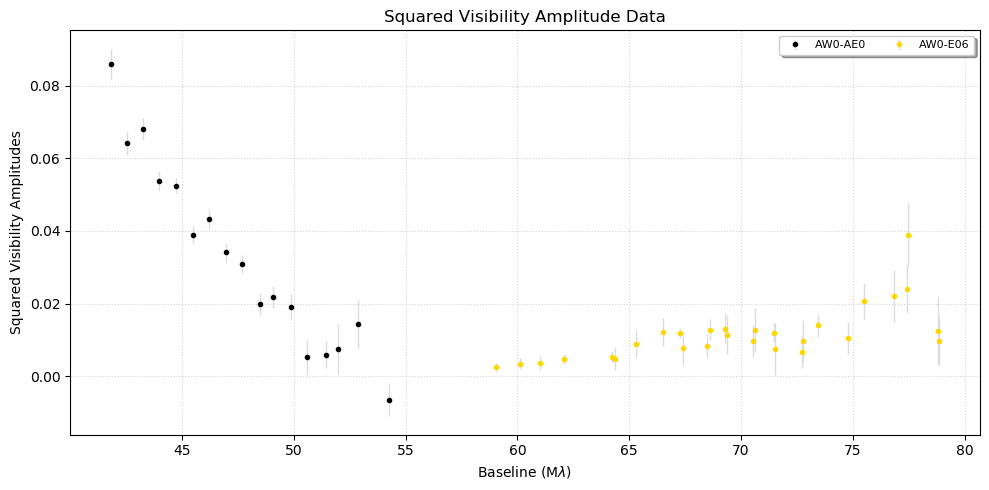

In [14]:
v2plot(data)

In [8]:
f_chi2, params, cvis_model = fit_model_v2(data, visibility_ud, [1.0]);# diameter is the parameter

Chi2: 1.599178038588461 	 parameters:[4.410408020019531] 	 	 XTOL_REACHED


In [16]:
v2_model = cvis_to_v2(cvis_model, data.indx_v2)

45-element Array{Float64,1}:
 0.000726805758911097
 0.002507539340333388
 0.010947524126705962
 0.013395279178317615
 0.015477538312164035
 0.016772088753532265
 0.017422151843369905
 0.017421075825520327
 0.001589090142524001
 0.0038130705189544055
 0.006674243628227972
 0.012466003205609309
 0.01467031926501011
 ⋮
 0.018093290562881798
 0.011232472595205394
 0.006483169356995696
 0.07447452857444399
 0.05812923659013294
 0.04332950444711233
 0.031218646773326073
 0.021473141832462586
 0.014107485785435183
 0.008199239685962895
 0.0042841929416485664
 0.001740627715789198

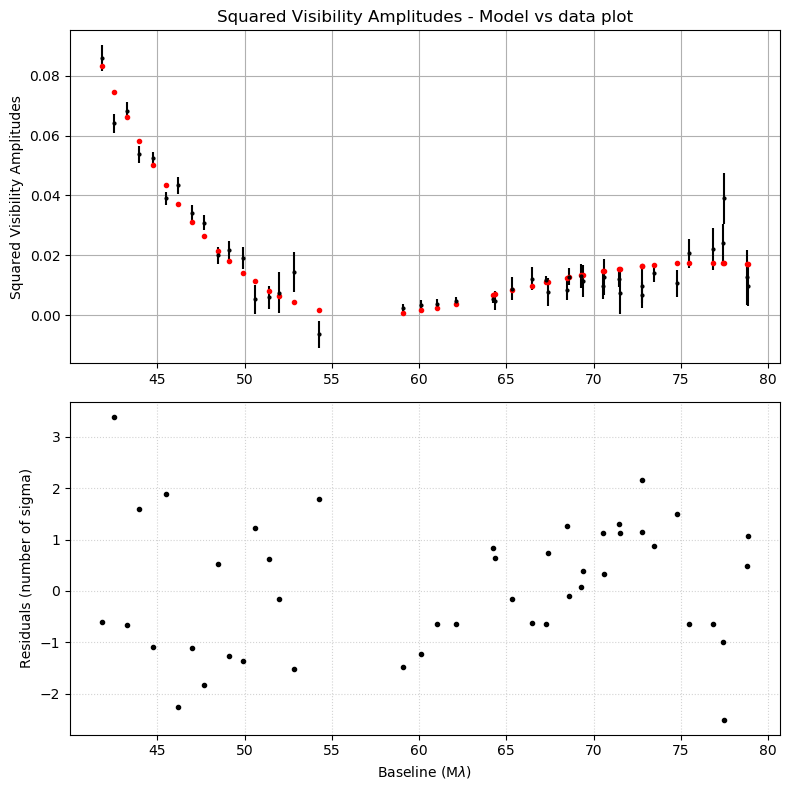

In [17]:
v2plot_modelvsdata(data, v2_model);

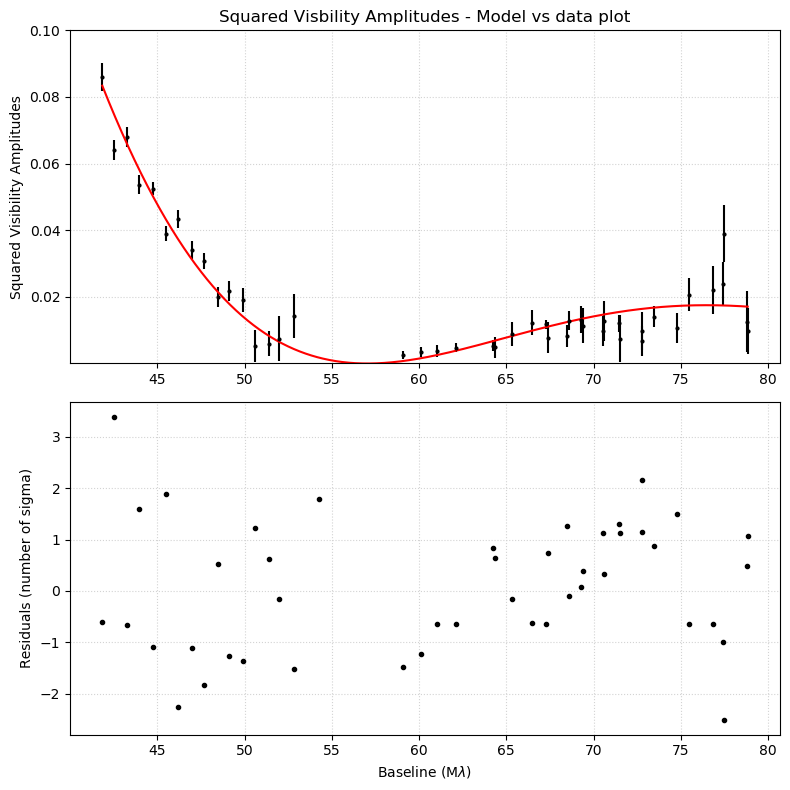

In [18]:
v2plot_modelvsfunc(data, visibility_ud,params , yrange=[1e-4, .1]);

In [9]:
oifitsfile = "./data/AlphaCenA.oifits";
data = (readoifits(oifitsfile))[1,1];

┌ Warning: V2 table 2 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 2 refers to station index 5, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 3 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 3 refers to station index 7, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 4 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 4 refers to station index 5, non existent in OI_ARRAY=VLTI; available index

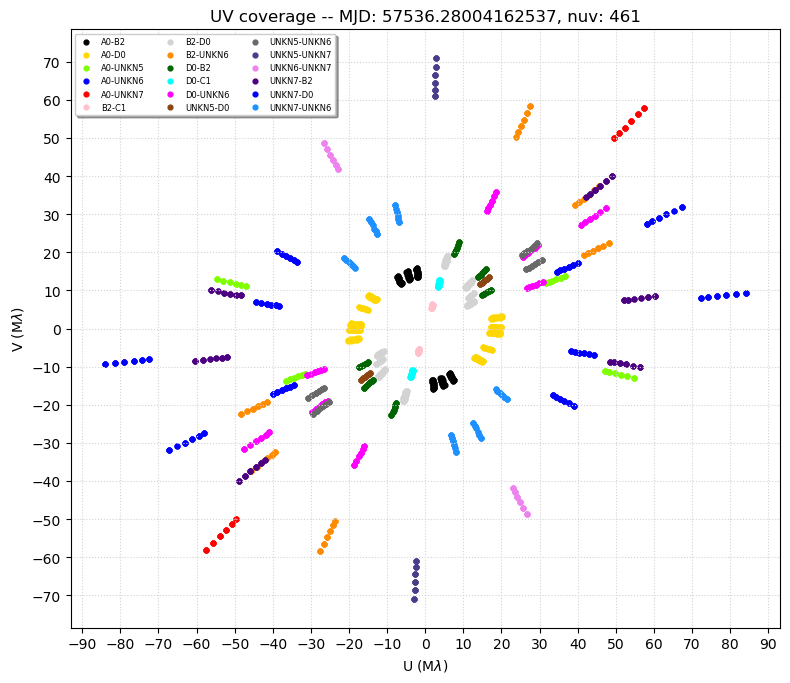

In [20]:
uvplot(data)

Finding mode...
Chi2: 15.23373708255482 	 parameters:[8.306655883789062] 	 	 XTOL_REACHED
Now boostraping to estimate errors...
Boostrap 10 out of 1000
Boostrap 20 out of 1000
Boostrap 30 out of 1000
Boostrap 40 out of 1000
Boostrap 50 out of 1000
Boostrap 60 out of 1000
Boostrap 70 out of 1000
Boostrap 80 out of 1000
Boostrap 90 out of 1000
Boostrap 100 out of 1000
Boostrap 110 out of 1000
Boostrap 120 out of 1000
Boostrap 130 out of 1000
Boostrap 140 out of 1000
Boostrap 150 out of 1000
Boostrap 160 out of 1000
Boostrap 170 out of 1000
Boostrap 180 out of 1000
Boostrap 190 out of 1000
Boostrap 200 out of 1000
Boostrap 210 out of 1000
Boostrap 220 out of 1000
Boostrap 230 out of 1000
Boostrap 240 out of 1000
Boostrap 250 out of 1000
Boostrap 260 out of 1000
Boostrap 270 out of 1000
Boostrap 280 out of 1000
Boostrap 290 out of 1000
Boostrap 300 out of 1000
Boostrap 310 out of 1000
Boostrap 320 out of 1000
Boostrap 330 out of 1000
Boostrap 340 out of 1000
Boostrap 350 out of 1000
Boostr

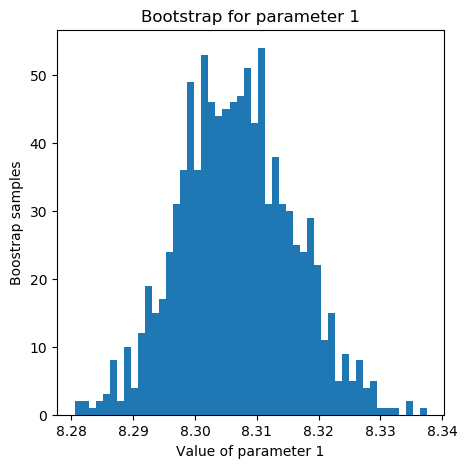

Boostrap mean: [8.30677442626824]
Bootstrap standard deviation: [0.009174141488079287]


In [10]:
params_mode, params_mean, params_err = bootstrap_v2_fit(1000, data, visibility_ud, [8.0]);

In [11]:
oifitsfile = "./data/2004-data1.oifits"
pixsize = 0.2 # milliarcseconds/pixel
nx = 64
data = readoifits(oifitsfile)[1,1];

┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


In [13]:
ft = setup_nfft(data, nx, pixsize);
#initial image is a simple Gaussian
x_start = gaussian2d(nx,nx,nx/6);
x_start = vec(x_start)/sum(x_start);
regularizers = [["centering", 1e3], ["tv", 7e3]];

In [14]:
x = reconstruct(x_start, data, ft, regularizers = regularizers, verb = true);

V2: 1091.2836551813396 T3A: 582.9567176901525 T3P: 600.7968755027684  Flux: 1.0  COG:[32.013331797791565 32.013331797791565] REGC: 0.4736918780815799 TV:0.13136358282340171
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    3.6808151683328627E+05  5.34E+10  0.00E+00
V2: 34550.69306938302 T3A: 1324.8094716997173 T3P: 808.3081989071069  Flux: 28.92707484758804  COG:[32.83751552732697 33.67345077996274] REGC: 1.4909034641819716 TV:20.409034009406536
V2: 34326.67746729385 T3A: 1346.4397570337915 T3P: 834.7961323369514  Flux: 14.719877331065874  COG:[32.82338832535512 33.643956534323685] REGC: 1.4132165613978442 TV:10.314398549560822
V2: 33803.226393725825 T3A: 1392.3144724579838 T3P: 917.986943179573  Flux: 7.622539062562132  COG:[32.79532565240242 33.58710428691983] REGC: 1.2690129716063905 TV:5.267585471530165
V2: 32340.5712561455 T3A: 1489.9212994364184 T3P: 1148.0468056996938  Flux:

V2: 6.685692703084628 T3A: 1.8557923153098124 T3P: 9.341723961481085  Flux: 0.8853196350980124  COG:[31.550348948791818 32.81385142637556] REGC: 1.0003398368987766 TV:0.20578173243505693
    26     44      0    5.2001991570284945E+03  2.13E+06  1.00E+00
V2: 5.912143523974463 T3A: 1.6937957858517574 T3P: 9.0582425391701  Flux: 0.8858429182379857  COG:[31.575222902749886 32.787954537918594] REGC: 0.9381304955062586 TV:0.20391976190956174
    27     45      0    4.9162017983010528E+03  1.78E+06  1.00E+00
V2: 5.434299374510322 T3A: 1.5794488977477323 T3P: 9.093427760260681  Flux: 0.8838245434720667  COG:[31.59859938159633 32.766710538627414] REGC: 0.8836575862734447 TV:0.20164429191002842
    28     46      0    4.7423299732142495E+03  1.38E+06  1.00E+00
V2: 5.3866438738653555 T3A: 1.596393664490024 T3P: 8.943218148591578  Flux: 0.88569165428025  COG:[31.666191390605267 32.76361848822545] REGC: 0.7647315044350489 TV:0.20278607751977024
    29     47      0    4.6047791381777934E+03  1.17E+

V2: 1.627728111926793 T3A: 0.8414459987377918 T3P: 1.503395497268392  Flux: 0.9206247101101184  COG:[32.18089158652251 32.37186050947421] REGC: 0.11824990858432768 TV:0.2143112941034337
    57     78      0    2.2406653436148922E+03  5.62E+05  1.00E+00
V2: 1.6469810004496221 T3A: 0.8456753945990267 T3P: 1.4696087815545378  Flux: 0.9220912108974436  COG:[32.19064736949323 32.366259158094806] REGC: 0.11358566279496989 TV:0.2152712867754674
V2: 1.6245097336534355 T3A: 0.8372533603511236 T3P: 1.485315937853238  Flux: 0.9212961150644976  COG:[32.1851828350322 32.36888925424131] REGC: 0.11629987501176228 TV:0.21465767577280054
    58     80      0    2.2376170122503527E+03  4.83E+05  4.77E-01
V2: 1.6809579823261236 T3A: 0.8331498305716428 T3P: 1.4203161354122371  Flux: 0.9235211754108836  COG:[32.20538834204215 32.354352095701685] REGC: 0.10800934103116513 TV:0.2172588578443997
V2: 1.6289611318182615 T3A: 0.8254775336921613 T3P: 1.4511907318101551  Flux: 0.9221400142286238  COG:[32.192320754

V2: 1.611709270071768 T3A: 0.7951562452077164 T3P: 1.3598607930111075  Flux: 0.9242693113091689  COG:[32.203836427947735 32.32791107957966] REGC: 0.11732745794219637 TV:0.21678507997781657
V2: 1.6117092734307084 T3A: 0.795156244875402 T3P: 1.3598608052657362  Flux: 0.9242693106548383  COG:[32.20383642500051 32.327911084207216] REGC: 0.11732745809521439 TV:0.21678507961692678
V2: 1.6117092750982434 T3A: 0.7951562447104271 T3P: 1.3598608113495068  Flux: 0.9242693103299982  COG:[32.20383642353736 32.32791108650455] REGC: 0.11732745817118624 TV:0.21678507943776454
V2: 1.6117092759261167 T3A: 0.7951562446285321 T3P: 1.3598608143697768  Flux: 0.9242693101687324  COG:[32.20383642281099 32.32791108764505] REGC: 0.11732745820890252 TV:0.21678507934881996
V2: 1.6117092763370788 T3A: 0.7951562445878683 T3P: 1.3598608158691845  Flux: 0.9242693100886723  COG:[32.20383642245039 32.32791108821125] REGC: 0.1173274582276214 TV:0.21678507930466376
V2: 1.611709276541114 T3A: 0.7951562445676859 T3P: 1.359

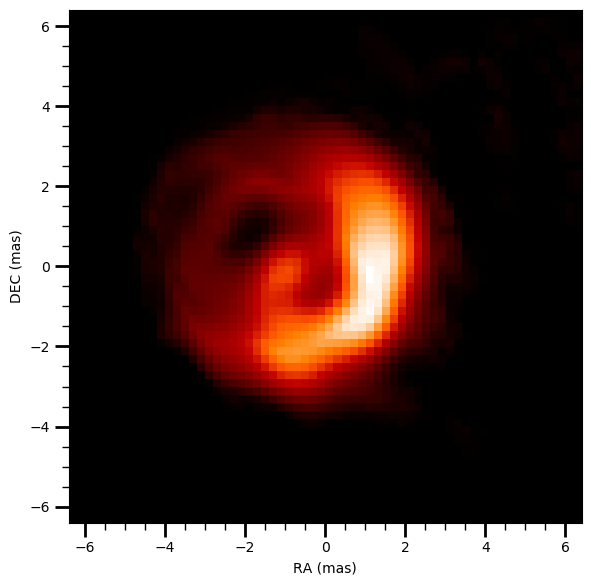

In [15]:
imdisp(x,pixscale=pixsize)

In [16]:
x=deepcopy(x_start)
for i=1:10 
 global x = reconstruct(x, data, ft, regularizers = regularizers, verb = true);
end

V2: 1091.2836551813396 T3A: 582.9567176901525 T3P: 600.7968755027684  Flux: 1.0  COG:[32.013331797791565 32.013331797791565] REGC: 0.4736918780815799 TV:0.13136358282340171
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    3.6808151683328627E+05  5.34E+10  0.00E+00
V2: 34550.69306938302 T3A: 1324.8094716997173 T3P: 808.3081989071069  Flux: 28.92707484758804  COG:[32.83751552732697 33.67345077996274] REGC: 1.4909034641819716 TV:20.409034009406536
V2: 34326.67746729385 T3A: 1346.4397570337915 T3P: 834.7961323369514  Flux: 14.719877331065874  COG:[32.82338832535512 33.643956534323685] REGC: 1.4132165613978442 TV:10.314398549560822
V2: 33803.226393725825 T3A: 1392.3144724579838 T3P: 917.986943179573  Flux: 7.622539062562132  COG:[32.79532565240242 33.58710428691983] REGC: 1.2690129716063905 TV:5.267585471530165
V2: 32340.5712561455 T3A: 1489.9212994364184 T3P: 1148.0468056996938  Flux:

V2: 7.8960027904587 T3A: 3.7619585604193397 T3P: 14.063929027058002  Flux: 0.8806945067381245  COG:[31.453764372951756 32.789161298481304] REGC: 1.1782232438444256 TV:0.19654747030108582
    23     41      0    6.4111414664635267E+03  1.58E+06  1.00E+00
V2: 6.734895611713768 T3A: 2.764229280988615 T3P: 12.672269856065032  Flux: 0.880608941176982  COG:[31.452845331578906 32.774882783579976] REGC: 1.1720934443047661 TV:0.19790184822313756
    24     42      0    5.8774559139678877E+03  1.45E+06  1.00E+00
V2: 5.987308474453857 T3A: 2.0633936077188224 T3P: 11.057494077819646  Flux: 0.8825666200233431  COG:[31.47641118465718 32.76486223917149] REGC: 1.117886068633853 TV:0.20027781341120293
    25     43      0    5.3930713141507767E+03  1.64E+06  1.00E+00
V2: 6.685692703084628 T3A: 1.8557923153098124 T3P: 9.341723961481085  Flux: 0.8853196350980124  COG:[31.550348948791818 32.81385142637556] REGC: 1.0003398368987766 TV:0.20578173243505693
    26     44      0    5.2001991570284945E+03  2.13

V2: 1.627728111926793 T3A: 0.8414459987377918 T3P: 1.503395497268392  Flux: 0.9206247101101184  COG:[32.18089158652251 32.37186050947421] REGC: 0.11824990858432768 TV:0.2143112941034337
    57     78      0    2.2406653436148922E+03  5.62E+05  1.00E+00
V2: 1.6469810004496221 T3A: 0.8456753945990267 T3P: 1.4696087815545378  Flux: 0.9220912108974436  COG:[32.19064736949323 32.366259158094806] REGC: 0.11358566279496989 TV:0.2152712867754674
V2: 1.6245097336534355 T3A: 0.8372533603511236 T3P: 1.485315937853238  Flux: 0.9212961150644976  COG:[32.1851828350322 32.36888925424131] REGC: 0.11629987501176228 TV:0.21465767577280054
    58     80      0    2.2376170122503527E+03  4.83E+05  4.77E-01
V2: 1.6809579823261236 T3A: 0.8331498305716428 T3P: 1.4203161354122371  Flux: 0.9235211754108836  COG:[32.20538834204215 32.354352095701685] REGC: 0.10800934103116513 TV:0.2172588578443997
V2: 1.6289611318182615 T3A: 0.8254775336921613 T3P: 1.4511907318101551  Flux: 0.9221400142286238  COG:[32.192320754

V2: 1.6117090555478577 T3A: 0.795156266439046 T3P: 1.3598600103070329  Flux: 0.9242693531016658  COG:[32.203836616189065 32.3279107840149] REGC: 0.11732744816871071 TV:0.2167851030293852
V2: 1.611709166928629 T3A: 0.7951562554139862 T3P: 1.3598604166967698  Flux: 0.9242693314023958  COG:[32.20383651845144 32.3279109374764] REGC: 0.1173274532432152 TV:0.21678509106035299
V2: 1.611709222225051 T3A: 0.7951562499418768 T3P: 1.359860618446174  Flux: 0.9242693206300088  COG:[32.20383646993055 32.327911013660845] REGC: 0.11732745576243561 TV:0.21678508511870548
V2: 1.6117092496772014 T3A: 0.7951562472255584 T3P: 1.359860718603658  Flux: 0.9242693152821274  COG:[32.20383644584268 32.32791105148211] REGC: 0.11732745701308678 TV:0.21678508216907738
V2: 1.6117092633058527 T3A: 0.7951562458771276 T3P: 1.35986076832643  Flux: 0.9242693126271979  COG:[32.20383643388439 32.3279110702583] REGC: 0.11732745763395785 TV:0.21678508070476468
V2: 1.611709270071768 T3A: 0.7951562452077164 T3P: 1.359860793011

V2: 1.5767399539462592 T3A: 0.8741405361484506 T3P: 1.329461526639106  Flux: 0.9251375966844331  COG:[32.210368176710446 32.336493462824244] REGC: 0.1106209807612383 TV:0.21066343118503275
V2: 1.5767398995794428 T3A: 0.8741384683788309 T3P: 1.3294779156532557  Flux: 0.9251369439666434  COG:[32.210365165699876 32.336494002768035] REGC: 0.11062254837087948 TV:0.2106625170589856
V2: 1.576739670297408 T3A: 0.8741377398571819 T3P: 1.3294854661691096  Flux: 0.9251366493634712  COG:[32.21036382745427 32.33649426430751] REGC: 0.1106232380512801 TV:0.21066210152867346
V2: 1.5767395380734817 T3A: 0.874137454179367 T3P: 1.3294888929579405  Flux: 0.9251365165027308  COG:[32.210363217306195 32.336494402283016] REGC: 0.11062354637400647 TV:0.21066191281326885
V2: 1.576739478604332 T3A: 0.8741373251018878 T3P: 1.3294904438055861  Flux: 0.9251364563777738  COG:[32.210362941189004 32.336494464722634] REGC: 0.1106236859030224 TV:0.2106618274340531
V2: 1.5767394517649929 T3A: 0.8741372667255222 T3P: 1.32

V2: 1.549997945908613 T3A: 0.8059141816248375 T3P: 1.2009509836594623  Flux: 0.9254376323290969  COG:[32.18834791917463 32.31560951201809] REGC: 0.13112687154098793 TV:0.20680521397626336
V2: 1.5465760191802638 T3A: 0.804415980722199 T3P: 1.2018315934782173  Flux: 0.9253452478254666  COG:[32.18762653273245 32.314454711154404] REGC: 0.13200423726554558 TV:0.20674099561265608
     8     22      0    2.1415857149403437E+03  2.95E+05  6.48E-02
V2: 1.7252680025707614 T3A: 0.8171034477496948 T3P: 1.2266077970876827  Flux: 0.9263787244301696  COG:[32.21020573437555 32.343692549500005] REGC: 0.10841273547062312 TV:0.21209072798557085
V2: 1.5681884246303786 T3A: 0.7912053664652064 T3P: 1.2085121908505367  Flux: 0.9254134978819766  COG:[32.19094478106319 32.31932127905595] REGC: 0.12815992855405955 TV:0.20730341362815785
V2: 1.5521729357095528 T3A: 0.7953455105871787 T3P: 1.204470652316177  Flux: 0.9253515364153228  COG:[32.18881800283812 32.31629585042671] REGC: 0.130581449928102 TV:0.206780211

V2: 1.5589975352752956 T3A: 0.7977551777969832 T3P: 1.2027787960786462  Flux: 0.9256344117245798  COG:[32.191181247279054 32.320000639141725] REGC: 0.12776879194150814 TV:0.20696121773066217
V2: 1.5589975354305452 T3A: 0.7977551752989572 T3P: 1.2027787965303596  Flux: 0.9256344116664907  COG:[32.19118124688809 32.320000638382346] REGC: 0.12776879245635614 TV:0.20696121766691394
V2: 1.5589975355060923 T3A: 0.7977551740834041 T3P: 1.2027787967501613  Flux: 0.9256344116382242  COG:[32.19118124669783 32.32000063801283] REGC: 0.127768792706895 TV:0.20696121763589365
V2: 1.5589975355428578 T3A: 0.7977551734918932 T3P: 1.2027787968571177  Flux: 0.9256344116244692  COG:[32.19118124660526 32.32000063783302] REGC: 0.12776879282880077 TV:0.2069612176207989
V2: 1.5589975355607697 T3A: 0.7977551732040753 T3P: 1.202778796909151  Flux: 0.9256344116177764  COG:[32.191181246560205 32.320000637745515] REGC: 0.12776879288812984 TV:0.2069612176134537
V2: 1.558997535569444 T3A: 0.7977551730640117 T3P: 1.20

V2: 1.5159918274723185 T3A: 0.8807989074547872 T3P: 1.2045518449232686  Flux: 0.92609478452015  COG:[32.19397030737483 32.32481018313652] REGC: 0.1243456447009135 TV:0.20477859307933544
V2: 1.5160963336629674 T3A: 0.8807873355750504 T3P: 1.2046420733847796  Flux: 0.926094943560044  COG:[32.19399862560289 32.324840145469324] REGC: 0.12431781577212955 TV:0.20477363386697778
V2: 1.5161432946040823 T3A: 0.8807822659166878 T3P: 1.2046825102009246  Flux: 0.9260950147086355  COG:[32.19401129413209 32.324853549510266] REGC: 0.12430536723787183 TV:0.20477149928845617
V2: 1.5161644470650444 T3A: 0.8807800085295044 T3P: 1.2047007023080007  Flux: 0.9260950466921722  COG:[32.19401698903506 32.32485957504892] REGC: 0.124299771451214 TV:0.20477055663867863
V2: 1.5161739849394358 T3A: 0.8807789959322341 T3P: 1.2047089009347325  Flux: 0.9260950611010157  COG:[32.19401955463503 32.32486228960296] REGC: 0.12429725054886429 TV:0.20477013539377703
V2: 1.516178287760345 T3A: 0.8807785401919233 T3P: 1.204712

V2: 1.5427991174695086 T3A: 0.7994003307321701 T3P: 1.1701307126099765  Flux: 0.9257884503991904  COG:[32.1878074186253 32.30605173461881] REGC: 0.13508013750977202 TV:0.20363195368766343
V2: 1.5163191334082182 T3A: 0.8135928532855331 T3P: 1.1777885599130662  Flux: 0.9256552428955076  COG:[32.186948994795635 32.31014948471969] REGC: 0.13404415001166334 TV:0.20309835798031683
     3     10      0    2.1102944706043018E+03  3.16E+05  4.83E-01
V2: 1.6004070380410407 T3A: 0.8633143136917442 T3P: 1.1161429400479648  Flux: 0.9263182488976887  COG:[32.19039336777906 32.31430672483632] REGC: 0.13033825915620684 TV:0.2047761647871369
V2: 1.5282228852820696 T3A: 0.81880037920092 T3P: 1.1556248603497061  Flux: 0.9257961910489274  COG:[32.18711282558628 32.310620134067534] REGC: 0.13376311753319864 TV:0.20308013319083426
     4     12      0    2.1100027936406236E+03  3.17E+05  3.23E-01
V2: 1.574970049573629 T3A: 0.8144501938563224 T3P: 1.1426341883752362  Flux: 0.926176471332113  COG:[32.19242903

V2: 1.550798691273886 T3A: 0.815367954972084 T3P: 1.1395066099166618  Flux: 0.9263263082382922  COG:[32.195121321934025 32.31726182980849] REGC: 0.12634424718419898 TV:0.20406743575516922
V2: 1.5508260242600826 T3A: 0.8039036462550575 T3P: 1.1445027795077785  Flux: 0.9261758395224834  COG:[32.19360924465726 32.316106009411165] REGC: 0.1276922947341813 TV:0.20345813615166616
V2: 1.5516776759481476 T3A: 0.8004278645307547 T3P: 1.1461777459567293  Flux: 0.9261312669147118  COG:[32.19316452342085 32.315864260320595] REGC: 0.12805398031483736 TV:0.20330672483760492
V2: 1.55214046528356 T3A: 0.7991033506851272 T3P: 1.1468013445211318  Flux: 0.9261146039271335  COG:[32.192987191835265 32.31581087290116] REGC: 0.1281824989186292 TV:0.20325530257285393
V2: 1.5523531228869913 T3A: 0.7985408177696889 T3P: 1.147076084860835  Flux: 0.9261075697387444  COG:[32.19291181024047 32.31578979981019] REGC: 0.12823655414375662 TV:0.2032353331584042
V2: 1.5524511390133309 T3A: 0.7982922376666957 T3P: 1.14719

V2: 1.5091061841108735 T3A: 0.8416028279417823 T3P: 1.1327913201254711  Flux: 0.9257963260038367  COG:[32.1876709559784 32.30618845679875] REGC: 0.1351123460174979 TV:0.201866258516831
V2: 1.5107949608604996 T3A: 0.8309710160932687 T3P: 1.1293958389773495  Flux: 0.9258175729354019  COG:[32.18716233131783 32.30775249315331] REGC: 0.13482651083526426 TV:0.20176062107445814
     4     11      0    2.0966035668834488E+03  3.98E+05  4.82E-01
V2: 1.5164976624101287 T3A: 0.8685630167837458 T3P: 1.1255080612321824  Flux: 0.9261966189103104  COG:[32.19321072816508 32.31156735527203] REGC: 0.12962651891217858 TV:0.2034301675344107
V2: 1.509132290980026 T3A: 0.840928519190727 T3P: 1.1276410054179065  Flux: 0.9259044754161615  COG:[32.18842857052714 32.30842664116309] REGC: 0.13377710747981975 TV:0.20179136516606422
     5     13      0    2.0965114985824966E+03  3.78E+05  3.76E-01
V2: 1.5373833227780374 T3A: 0.9520896441679406 T3P: 1.1541561812238985  Flux: 0.9269642534801266  COG:[32.20457206570

V2: 1.5039317979985156 T3A: 0.8463713352770196 T3P: 1.129930730005834  Flux: 0.9261679953223891  COG:[32.19182313143877 32.31072457708431] REGC: 0.13079816803612168 TV:0.20203072975693903
V2: 1.5039317985312846 T3A: 0.8463713350538687 T3P: 1.1299307302415997  Flux: 0.9261679952843072  COG:[32.1918231308568 32.31072457697053] REGC: 0.1307981684378923 TV:0.20203072963056973
V2: 1.5039317987832155 T3A: 0.8463713349483288 T3P: 1.1299307303530852  Flux: 0.9261679952662984  COG:[32.191823130581604 32.31072457691673] REGC: 0.13079816862787286 TV:0.2020307295708118
V2: 1.5039317989023513 T3A: 0.8463713348984352 T3P: 1.1299307304058013  Flux: 0.9261679952577828  COG:[32.19182313045145 32.31072457689129] REGC: 0.13079816871772343 TV:0.2020307295425534
V2: 1.5039317989586996 T3A: 0.8463713348748413 T3P: 1.1299307304307369  Flux: 0.9261679952537559  COG:[32.19182313038991 32.310724576879245] REGC: 0.13079816876021305 TV:0.20203072952919043
V2: 1.5039317989853112 T3A: 0.8463713348636696 T3P: 1.1299

V2: 1.5247631137838158 T3A: 0.8140181154622327 T3P: 1.1054123628630796  Flux: 0.9262945295997316  COG:[32.19269653038729 32.30930540006375] REGC: 0.1307998528808579 TV:0.20185463876719634
V2: 1.5277736191278557 T3A: 0.8098882046076912 T3P: 1.107481669015525  Flux: 0.9262539494092702  COG:[32.19195424559651 32.310068867812525] REGC: 0.13096602178002953 TV:0.20149553616639135
V2: 1.5294847049259876 T3A: 0.8089414441933154 T3P: 1.1083596176488526  Flux: 0.9262463217077763  COG:[32.19181284136193 32.3104648909554] REGC: 0.13090288230995475 TV:0.20140748913437695
V2: 1.53026221328962 T3A: 0.808608610884707 T3P: 1.1087427762914486  Flux: 0.9262439330068685  COG:[32.191759291243066 32.31064188523023] REGC: 0.1308688301641372 TV:0.20137809966548786
V2: 1.5306319645766995 T3A: 0.808493551502398 T3P: 1.1089279992295782  Flux: 0.9262432340091014  COG:[32.19174023474093 32.31073021591891] REGC: 0.13084713404368192 TV:0.20136595336775598
V2: 1.5308100229642878 T3A: 0.8084410879106796 T3P: 1.1090163

V2: 1.4985540731672287 T3A: 0.8325744661761263 T3P: 1.1119572487495046  Flux: 0.9261454793675374  COG:[32.190909793899934 32.305073512185125] REGC: 0.13353309115882414 TV:0.20062724108491248
     2      8      0    2.0829309459611532E+03  2.33E+05  1.00E+00
V2: 1.4976900664590125 T3A: 0.836999871431668 T3P: 1.1266556479006309  Flux: 0.9261887390012846  COG:[32.19364012981161 32.30206798608921] REGC: 0.1330334521926257 TV:0.20021776541954825
     3      9      0    2.0818825906021698E+03  2.89E+05  1.00E+00
V2: 1.5083082815116358 T3A: 0.8346857373864857 T3P: 1.1111035403108918  Flux: 0.9261095068084315  COG:[32.19410705285869 32.300329122104365] REGC: 0.1334389545904094 TV:0.20130290435994738
V2: 1.4984425433204769 T3A: 0.8326813826256751 T3P: 1.12047208228905  Flux: 0.9261213915516677  COG:[32.1931929666606 32.300880655813025] REGC: 0.1337790689359769 TV:0.20034324186641903
V2: 1.4975534714396814 T3A: 0.834629924235796 T3P: 1.1237078075270022  Flux: 0.9261531917548306  COG:[32.19335852

V2: 1.5034269819216721 T3A: 0.8399101238963602 T3P: 1.1045442020148613  Flux: 0.9263666314046715  COG:[32.19423168689185 32.30404258834722] REGC: 0.13189356848266176 TV:0.20041913977773101
V2: 1.5034269819155055 T3A: 0.8399101239019539 T3P: 1.1045442020233482  Flux: 0.9263666314046446  COG:[32.194231686892465 32.304042588346626] REGC: 0.13189356848251763 TV:0.20041913977763
V2: 1.5034269819125097 T3A: 0.8399101239047113 T3P: 1.104544202027509  Flux: 0.9263666314046317  COG:[32.19423168689277 32.30404258834633] REGC: 0.13189356848244776 TV:0.20041913977758052
V2: 1.5034269819110018 T3A: 0.8399101239060557 T3P: 1.104544202029564  Flux: 0.926366631404625  COG:[32.19423168689291 32.30404258834619] REGC: 0.13189356848241376 TV:0.2004191397775561
V2: 1.503426981910278 T3A: 0.8399101239067107 T3P: 1.104544202030565  Flux: 0.9263666314046217  COG:[32.19423168689299 32.30404258834613] REGC: 0.13189356848239103 TV:0.20041913977754416
V2: 1.5034269819099435 T3A: 0.8399101239070472 T3P: 1.10454420

V2: 1.5154430840473316 T3A: 0.8274867295900122 T3P: 1.1042618017485049  Flux: 0.9263963194951641  COG:[32.1918870589043 32.3046989688265] REGC: 0.13307607724807496 TV:0.19968299696005626
V2: 1.515530734761326 T3A: 0.8275413235593944 T3P: 1.1042044039788055  Flux: 0.9263973247460413  COG:[32.19189066933426 32.30472816396616] REGC: 0.13306244959131486 TV:0.19968245260526324
V2: 1.5155742634858542 T3A: 0.8275684205635456 T3P: 1.1041760056912975  Flux: 0.9263978226728655  COG:[32.191892457670946 32.30474262505238] REGC: 0.13305570011148657 TV:0.1996822008133452
V2: 1.5155959437823985 T3A: 0.8275819129882945 T3P: 1.1041618875638484  Flux: 0.9263980703555661  COG:[32.1918933472388 32.30474981839449] REGC: 0.13305234289269285 TV:0.1996820799661146
V2: 1.5156067578007788 T3A: 0.8275886420108824 T3P: 1.104154852001329  Flux: 0.9263981938193292  COG:[32.19189379066644 32.30475340409803] REGC: 0.1330506694412022 TV:0.19968202081865036
V2: 1.5156121556990412 T3A: 0.8275920006220802 T3P: 1.10415134

     7     25      0    2.0737639588872989E+03  1.63E+05  2.68E-02
V2: 1.5351206579348233 T3A: 0.8168309933634772 T3P: 1.1193810546274379  Flux: 0.9261682890534759  COG:[32.19458337038036 32.29709388777427] REGC: 0.1344502080267839 TV:0.2010895446355468
V2: 1.5105137927693248 T3A: 0.8288584452087062 T3P: 1.115179846855909  Flux: 0.9263220906060018  COG:[32.194304415374546 32.298162105784456] REGC: 0.13418832600086303 TV:0.19906307692084743
V2: 1.507572882629508 T3A: 0.8339227559355096 T3P: 1.1145310812213989  Flux: 0.9263776779536395  COG:[32.19449381558143 32.29873526393482] REGC: 0.13384152270137784 TV:0.19894781268254125
     8     28      0    2.0737519224223188E+03  1.39E+05  1.23E-01
V2: 1.5793089213398768 T3A: 0.8894477347402747 T3P: 1.1239835923977022  Flux: 0.927175720127096  COG:[32.20383642276315 32.30847842271677] REGC: 0.12439337904678291 TV:0.20213408483782314
V2: 1.51641645339942 T3A: 0.8409002164800182 T3P: 1.1154486105301067  Flux: 0.9265244238697457  COG:[32.196191058

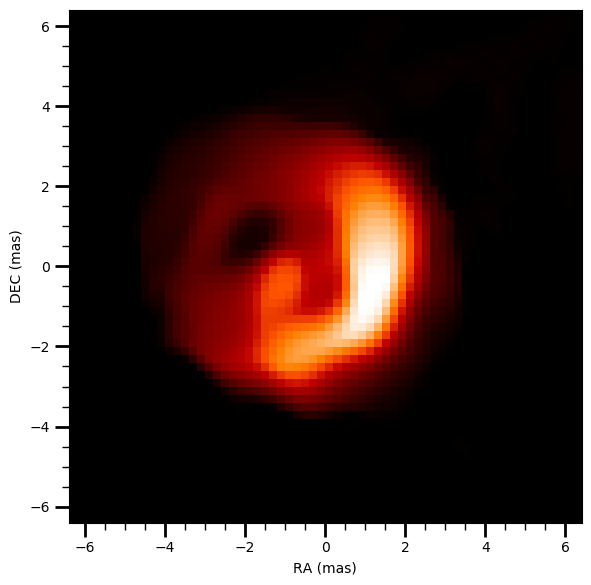

In [17]:
imdisp(x,pixscale=pixsize);

In [18]:
using Dates;
dates = collect(DateTime(2018,8,13,5,00,00):Minute(15):DateTime(2018,8,13,7,30,00))
image_file="./data/2004true.fits";
pixsize=0.101;
out_file="./data/2004testsimulation.oifits";
obs = read_obs_file("./data/default_obs.txt"); # read defaults (for OIFITS header)
obs.target[1] = "AZ Cyg"
radec = ra_dec_from_simbad(obs.target[1])
obs.raep0[1], obs.decep0[1] = (radec[1]'*[1.0, 1/60., 1/3600], radec[2]'*[1.0, 1/60., 1/3600])
facility    = read_facility_file("./data/CHARA_new.txt");
combiner    = read_comb_file("./data/MIRC.txt");
wave        = read_wave_file("./data/MIRC_LOWH.txt");
v2m=1.0/100; v2a=1e-5; t3ampm=1.0/100; t3ampa=1e-6; t3phim=0.0; t3phia=0.5;
errors      = define_errors(v2m,v2a,t3ampm,t3ampa,t3phim,t3phia);
lst, hour_angles = hour_angle_calc(dates,facility.lon[1],obs.raep0[1]);
simulate_ha(facility, obs, combiner, wave, hour_angles, image_file, pixsize, errors, out_file);

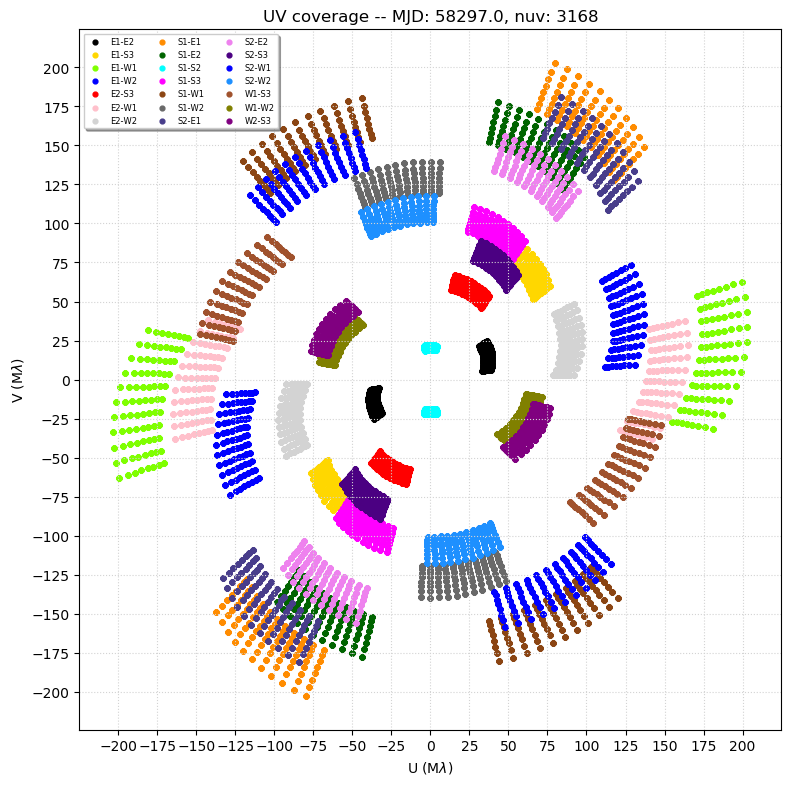

In [19]:
data = (readoifits(out_file))[1,1]; # data can be split by wavelength, time, etc.
uvplot(data)

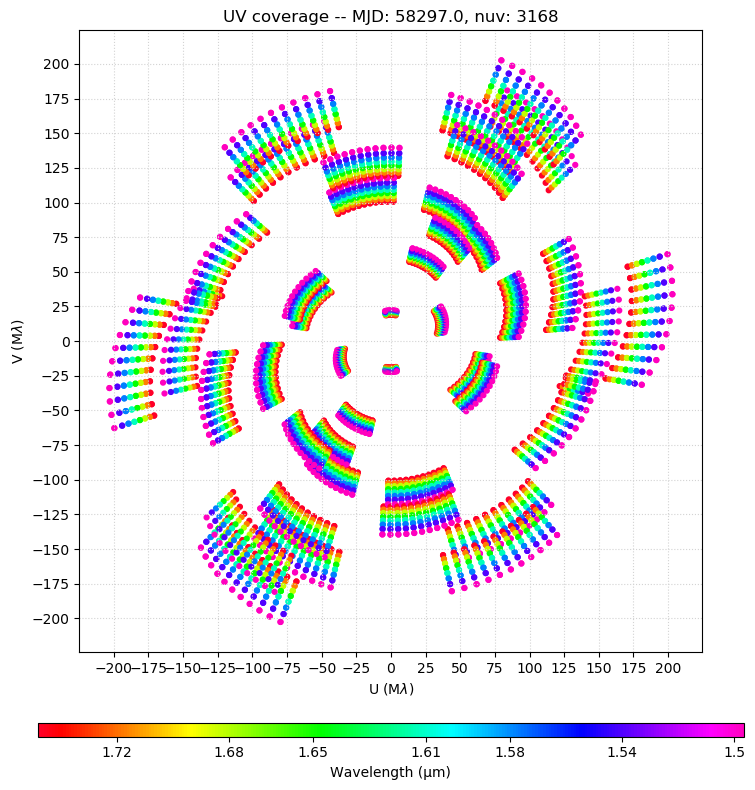

In [20]:
uvplot(data, bywavelength=true)


In [21]:
oifitsfile = "./data/MWC480.oifits"
data = vec(readoifits(oifitsfile, filter_bad_data = true, polychromatic = true)) # vec is to get rid of degenerate (temporal) dimension


8-element Array{OIdata,1}:
 OIdata(Float64[], Float64[], Float64[], Float64[], Float64[], Float64[], Float64[], Float64[], Bool[], [0.15820561439946734, 0.18921224682087795, 0.24603546300585497, 0.21279417678499174, 0.559779292268836, 0.34247842618785573, 0.21147055545168342, 0.19705155224982177, 0.21055397752753408, 0.2116673637347806  …  0.24552030465661973, 0.29934130184522295, 0.4152927008098872, 0.2706860566208399, 0.2789983176685195, 0.15923771277088838, 0.18438789873658212, 0.6415807746520016, 0.18143935701829264, 0.2269034705329926], [0.008043090636250413, 0.00796700759330238, 0.03269052988127508, 0.011738288843621367, 0.0434017705010741, 0.012188311387121158, 0.020484677733659546, 0.014895089602580708, 0.015043414976007013, 0.024313078024718472  …  0.015314748394689203, 0.026087937057244628, 0.18257841481699114, 0.03952114751055451, 0.06883750005167712, 0.02873196741378898, 0.11647272751683169, 0.01967432639841664, 0.0776212171502659, 0.01424465073585055], [1.2014332061097218e

In [55]:
length(data)

8

In [22]:
[data[i].nv2 for i=1:length(data)]

8-element Array{Int64,1}:
 157
 157
 156
 155
 157
 155
 155
 141

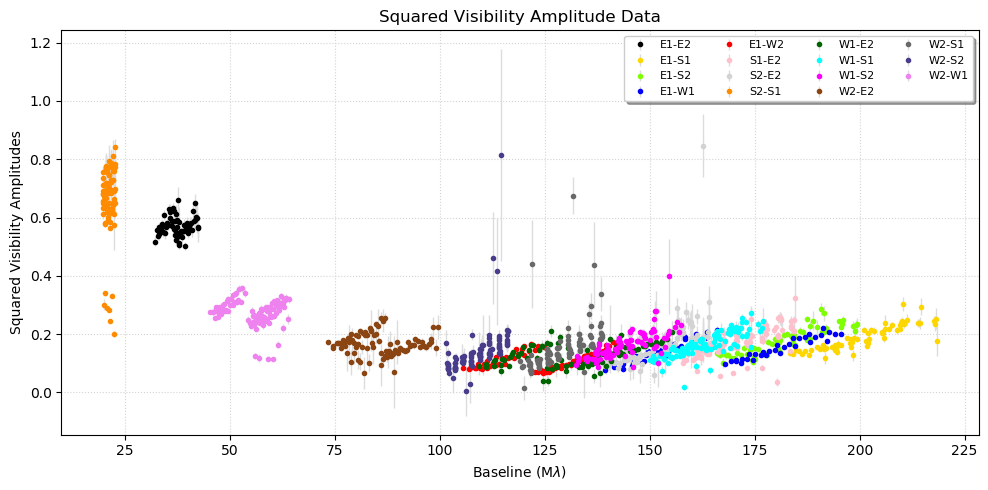

In [58]:
v2plot(data)

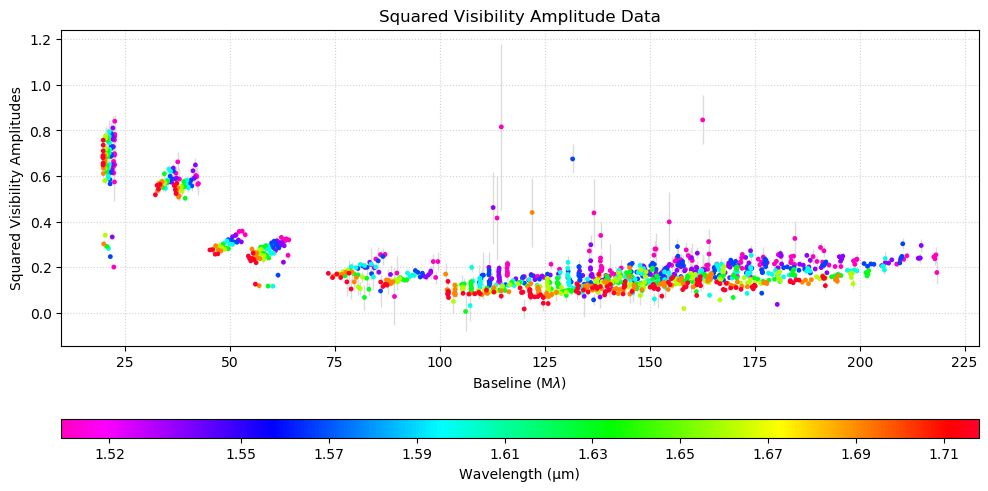

In [59]:
v2plot(data,bywavelength=true)

In [67]:
nx = 64 #number of pixels (side)
pixsize = 0.2 # mas/pixel

fftplan = setup_nfft_polychromatic(data, nx, pixsize);
nwav = length(fftplan)

# Setup regularization
regularizers = [   [ ["centering", 1e4], ["tv", 7e1] ]]  # Frame 1 is centered
for i=1:nwav-1
    push!(regularizers,[["centering", 1e4], ["tv",7e1]]) # Total variation for all
end
push!(regularizers,[ ["transspectral_tvsq", 1e6] ] ); #transspectral regularization ties the frames together

pointsource = zeros(nx,nx); pointsource[div(nx+1,2), div(nx+1,2)] = 1.0;
x_start = zeros(nx, nx, nwav);
for i=1:nwav
    x_start[:,:,i]=pointsource
end


In [68]:
x = vec(x_start);
for i=1:4
   global x = reconstruct_polychromatic(x, data, fftplan, regularizers = regularizers, maxiter = 200, verb=false);
end


V2+T3AMP+T3PHI chi2r: 6823.808287921575 
V2+T3AMP+T3PHI chi2r: 314.1735325794298 
V2+T3AMP+T3PHI chi2r: 300.03119259016466 
V2+T3AMP+T3PHI chi2r: 291.4398657826862 
V2+T3AMP+T3PHI chi2r: 280.89992445468874 
V2+T3AMP+T3PHI chi2r: 270.1906726331555 
V2+T3AMP+T3PHI chi2r: 258.633307926144 
V2+T3AMP+T3PHI chi2r: 247.63816435207124 
V2+T3AMP+T3PHI chi2r: 238.31296797063408 
V2+T3AMP+T3PHI chi2r: 232.07087618622677 
V2+T3AMP+T3PHI chi2r: 230.02048157525877 
V2+T3AMP+T3PHI chi2r: 226.740683789772 
V2+T3AMP+T3PHI chi2r: 228.2375451907312 
V2+T3AMP+T3PHI chi2r: 224.1686365805823 
V2+T3AMP+T3PHI chi2r: 218.9780322111726 
V2+T3AMP+T3PHI chi2r: 217.97773014164383 
V2+T3AMP+T3PHI chi2r: 216.99833363479183 
V2+T3AMP+T3PHI chi2r: 226.57035944922856 
V2+T3AMP+T3PHI chi2r: 217.59607251328393 
V2+T3AMP+T3PHI chi2r: 216.56121688410678 
V2+T3AMP+T3PHI chi2r: 216.56284459609086 
V2+T3AMP+T3PHI chi2r: 216.37799932956253 
V2+T3AMP+T3PHI chi2r: 215.5845066975097 
V2+T3AMP+T3PHI chi2r: 214.48632345035915 
V2+T

V2+T3AMP+T3PHI chi2r: 24.010553003911948 
V2+T3AMP+T3PHI chi2r: 23.66897920178364 
V2+T3AMP+T3PHI chi2r: 23.425030987651493 
V2+T3AMP+T3PHI chi2r: 23.20363667927652 
V2+T3AMP+T3PHI chi2r: 22.87475761003827 
V2+T3AMP+T3PHI chi2r: 22.663373495492262 
V2+T3AMP+T3PHI chi2r: 22.202813656462922 
V2+T3AMP+T3PHI chi2r: 22.028241050899094 
V2+T3AMP+T3PHI chi2r: 21.736826281465184 
V2+T3AMP+T3PHI chi2r: 21.297090576017464 
V2+T3AMP+T3PHI chi2r: 20.684733579530473 
V2+T3AMP+T3PHI chi2r: 19.839228133642067 
V2+T3AMP+T3PHI chi2r: 19.77733301261884 
V2+T3AMP+T3PHI chi2r: 19.537458650822504 
V2+T3AMP+T3PHI chi2r: 19.537458650822504 
V2+T3AMP+T3PHI chi2r: 1323.391520468947 
V2+T3AMP+T3PHI chi2r: 102.68624093866553 
V2+T3AMP+T3PHI chi2r: 20.710143297472197 
V2+T3AMP+T3PHI chi2r: 19.427795764294885 
V2+T3AMP+T3PHI chi2r: 19.303372629118325 
V2+T3AMP+T3PHI chi2r: 19.22242478132152 
V2+T3AMP+T3PHI chi2r: 19.11772842174428 
V2+T3AMP+T3PHI chi2r: 18.95485738928016 
V2+T3AMP+T3PHI chi2r: 18.857643256061028 


V2+T3AMP+T3PHI chi2r: 13.415601750334265 
V2+T3AMP+T3PHI chi2r: 13.4117188487301 
V2+T3AMP+T3PHI chi2r: 13.4037586272262 
V2+T3AMP+T3PHI chi2r: 13.40157885103435 
V2+T3AMP+T3PHI chi2r: 13.398798369241304 
V2+T3AMP+T3PHI chi2r: 13.397029371132898 
V2+T3AMP+T3PHI chi2r: 13.390652124496071 
V2+T3AMP+T3PHI chi2r: 13.386444792738834 
V2+T3AMP+T3PHI chi2r: 13.38296111087432 
V2+T3AMP+T3PHI chi2r: 13.37928751970511 
V2+T3AMP+T3PHI chi2r: 13.375776835173307 
V2+T3AMP+T3PHI chi2r: 13.37197429033708 
V2+T3AMP+T3PHI chi2r: 13.364535403665206 
V2+T3AMP+T3PHI chi2r: 13.359099804576843 
V2+T3AMP+T3PHI chi2r: 13.35338155491297 
V2+T3AMP+T3PHI chi2r: 13.34826738702693 
V2+T3AMP+T3PHI chi2r: 13.345486233029414 
V2+T3AMP+T3PHI chi2r: 13.341782542813865 
V2+T3AMP+T3PHI chi2r: 13.339428875173148 
V2+T3AMP+T3PHI chi2r: 13.336945140296875 
V2+T3AMP+T3PHI chi2r: 13.333315679035035 
V2+T3AMP+T3PHI chi2r: 13.329411395457507 
V2+T3AMP+T3PHI chi2r: 13.329411395457507 
V2+T3AMP+T3PHI chi2r: 2547.275283199979 
V2+

V2+T3AMP+T3PHI chi2r: 12.973424192450109 
V2+T3AMP+T3PHI chi2r: 12.973014444069133 
V2+T3AMP+T3PHI chi2r: 12.972645943745922 
V2+T3AMP+T3PHI chi2r: 12.971995255930086 
V2+T3AMP+T3PHI chi2r: 12.970860501246452 
V2+T3AMP+T3PHI chi2r: 12.968962250255073 
V2+T3AMP+T3PHI chi2r: 12.96702273008293 
V2+T3AMP+T3PHI chi2r: 12.965628737880484 
V2+T3AMP+T3PHI chi2r: 12.964487503696692 
V2+T3AMP+T3PHI chi2r: 12.964036989855574 
V2+T3AMP+T3PHI chi2r: 12.963764097716226 
V2+T3AMP+T3PHI chi2r: 12.963713493452431 
V2+T3AMP+T3PHI chi2r: 12.963616426357422 
V2+T3AMP+T3PHI chi2r: 12.963652139420184 
V2+T3AMP+T3PHI chi2r: 12.963458061138384 
V2+T3AMP+T3PHI chi2r: 12.963536917546467 
V2+T3AMP+T3PHI chi2r: 12.963265747590162 
V2+T3AMP+T3PHI chi2r: 12.96343384769043 
V2+T3AMP+T3PHI chi2r: 12.962984683302443 
V2+T3AMP+T3PHI chi2r: 12.963096286926413 
V2+T3AMP+T3PHI chi2r: 12.962738318483918 
V2+T3AMP+T3PHI chi2r: 12.962927488800235 
V2+T3AMP+T3PHI chi2r: 12.962312910082401 
V2+T3AMP+T3PHI chi2r: 12.96274767716

V2+T3AMP+T3PHI chi2r: 12.815729820009324 
V2+T3AMP+T3PHI chi2r: 12.81571783477627 
V2+T3AMP+T3PHI chi2r: 12.818979973109693 
V2+T3AMP+T3PHI chi2r: 12.815513723041386 
V2+T3AMP+T3PHI chi2r: 12.815523713537932 
V2+T3AMP+T3PHI chi2r: 12.819793021257903 
V2+T3AMP+T3PHI chi2r: 12.814763504190976 
V2+T3AMP+T3PHI chi2r: 12.827184708160944 
V2+T3AMP+T3PHI chi2r: 12.814888960268219 
V2+T3AMP+T3PHI chi2r: 12.814657712782177 
V2+T3AMP+T3PHI chi2r: 12.82501808150412 
V2+T3AMP+T3PHI chi2r: 12.814896934474342 
V2+T3AMP+T3PHI chi2r: 12.814612690968534 
V2+T3AMP+T3PHI chi2r: 12.814615222970751 
V2+T3AMP+T3PHI chi2r: 12.846346585347984 
V2+T3AMP+T3PHI chi2r: 12.814257045310237 
V2+T3AMP+T3PHI chi2r: 12.822639217305547 
V2+T3AMP+T3PHI chi2r: 12.814731194834883 
V2+T3AMP+T3PHI chi2r: 12.814335287034332 
V2+T3AMP+T3PHI chi2r: 12.814276224182604 
V2+T3AMP+T3PHI chi2r: 12.814263125366367 
V2+T3AMP+T3PHI chi2r: 12.814259289912213 
V2+T3AMP+T3PHI chi2r: 12.814257923124384 
V2+T3AMP+T3PHI chi2r: 12.81425740077

V2+T3AMP+T3PHI chi2r: 12.680441888024978 
V2+T3AMP+T3PHI chi2r: 12.680158256763034 
V2+T3AMP+T3PHI chi2r: 12.679318115964405 
V2+T3AMP+T3PHI chi2r: 12.67846168169024 
V2+T3AMP+T3PHI chi2r: 12.67681823085502 
V2+T3AMP+T3PHI chi2r: 12.675572905878107 
V2+T3AMP+T3PHI chi2r: 12.675154694071162 
V2+T3AMP+T3PHI chi2r: 12.674943222484691 
V2+T3AMP+T3PHI chi2r: 12.674861779179217 
V2+T3AMP+T3PHI chi2r: 12.674875550512198 
V2+T3AMP+T3PHI chi2r: 12.674580957149477 
V2+T3AMP+T3PHI chi2r: 12.674493948341322 
V2+T3AMP+T3PHI chi2r: 12.674446636924335 
V2+T3AMP+T3PHI chi2r: 12.67394873111704 
V2+T3AMP+T3PHI chi2r: 12.673320377334592 
V2+T3AMP+T3PHI chi2r: 12.672646172419688 
V2+T3AMP+T3PHI chi2r: 12.674277785356168 
V2+T3AMP+T3PHI chi2r: 12.672367238699982 
V2+T3AMP+T3PHI chi2r: 12.67211185050818 
V2+T3AMP+T3PHI chi2r: 12.671726185548293 
V2+T3AMP+T3PHI chi2r: 12.671117131628968 
V2+T3AMP+T3PHI chi2r: 12.670604569138947 
V2+T3AMP+T3PHI chi2r: 12.670199435557144 
V2+T3AMP+T3PHI chi2r: 12.6695569440233

V2+T3AMP+T3PHI chi2r: 12.554564241660895 
V2+T3AMP+T3PHI chi2r: 12.553777796320945 
V2+T3AMP+T3PHI chi2r: 12.552802628071149 
V2+T3AMP+T3PHI chi2r: 12.551275296738462 
V2+T3AMP+T3PHI chi2r: 12.548301240680626 
V2+T3AMP+T3PHI chi2r: 12.545163311338575 
V2+T3AMP+T3PHI chi2r: 12.541902980215447 
V2+T3AMP+T3PHI chi2r: 12.541506403700033 
V2+T3AMP+T3PHI chi2r: 12.540714644733693 
V2+T3AMP+T3PHI chi2r: 12.540228037117675 
V2+T3AMP+T3PHI chi2r: 12.538857587281935 
V2+T3AMP+T3PHI chi2r: 12.537662248807877 
V2+T3AMP+T3PHI chi2r: 12.536109704831881 
V2+T3AMP+T3PHI chi2r: 12.534655756811562 
V2+T3AMP+T3PHI chi2r: 12.533255665891003 
V2+T3AMP+T3PHI chi2r: 12.531823407014626 
V2+T3AMP+T3PHI chi2r: 12.530654613564684 
V2+T3AMP+T3PHI chi2r: 12.52978079897293 
V2+T3AMP+T3PHI chi2r: 12.527759692127692 
V2+T3AMP+T3PHI chi2r: 12.52717582536981 
V2+T3AMP+T3PHI chi2r: 12.526536508417255 
V2+T3AMP+T3PHI chi2r: 12.525657444798656 
V2+T3AMP+T3PHI chi2r: 12.524690490373203 
V2+T3AMP+T3PHI chi2r: 12.52340636241

V2+T3AMP+T3PHI chi2r: 12.481111914846183 
V2+T3AMP+T3PHI chi2r: 12.479802763788635 
V2+T3AMP+T3PHI chi2r: 12.478620247458215 
V2+T3AMP+T3PHI chi2r: 12.478024637568897 
V2+T3AMP+T3PHI chi2r: 12.477557431189576 
V2+T3AMP+T3PHI chi2r: 12.476317311188556 
V2+T3AMP+T3PHI chi2r: 12.475621302419263 
V2+T3AMP+T3PHI chi2r: 12.47524726558583 
V2+T3AMP+T3PHI chi2r: 12.474858504252467 
V2+T3AMP+T3PHI chi2r: 12.473923856731291 
V2+T3AMP+T3PHI chi2r: 12.473373127542242 
V2+T3AMP+T3PHI chi2r: 12.47330484010623 
V2+T3AMP+T3PHI chi2r: 12.47304456716291 
V2+T3AMP+T3PHI chi2r: 12.472592736818308 
V2+T3AMP+T3PHI chi2r: 12.472663700303643 
V2+T3AMP+T3PHI chi2r: 12.472247546726008 
V2+T3AMP+T3PHI chi2r: 12.471672859686603 
V2+T3AMP+T3PHI chi2r: 12.471233788194736 
V2+T3AMP+T3PHI chi2r: 12.46965553283392 
V2+T3AMP+T3PHI chi2r: 12.467948685210748 
V2+T3AMP+T3PHI chi2r: 12.465720376781055 
V2+T3AMP+T3PHI chi2r: 12.464101399332899 
V2+T3AMP+T3PHI chi2r: 12.463459775036002 
V2+T3AMP+T3PHI chi2r: 12.4625893141814

V2+T3AMP+T3PHI chi2r: 12.392429458112616 
V2+T3AMP+T3PHI chi2r: 12.390912169103023 
V2+T3AMP+T3PHI chi2r: 12.389332023544942 
V2+T3AMP+T3PHI chi2r: 12.388016366889808 
V2+T3AMP+T3PHI chi2r: 12.386134255077472 
V2+T3AMP+T3PHI chi2r: 12.385237752476037 
V2+T3AMP+T3PHI chi2r: 12.3832888244925 
V2+T3AMP+T3PHI chi2r: 12.38354115726253 
V2+T3AMP+T3PHI chi2r: 12.382810784194481 
V2+T3AMP+T3PHI chi2r: 12.382588500942108 
V2+T3AMP+T3PHI chi2r: 12.382553426939111 
V2+T3AMP+T3PHI chi2r: 12.382979459697703 
V2+T3AMP+T3PHI chi2r: 12.381931626484105 
V2+T3AMP+T3PHI chi2r: 12.387555273273707 
V2+T3AMP+T3PHI chi2r: 12.381419209788316 
V2+T3AMP+T3PHI chi2r: 12.381557557204065 
V2+T3AMP+T3PHI chi2r: 12.384651540280109 
V2+T3AMP+T3PHI chi2r: 12.38099737722467 
V2+T3AMP+T3PHI chi2r: 12.381155557071263 
V2+T3AMP+T3PHI chi2r: 12.384431124033744 
V2+T3AMP+T3PHI chi2r: 12.379892297896392 
V2+T3AMP+T3PHI chi2r: 12.384430746029789 
V2+T3AMP+T3PHI chi2r: 12.37974210870996 
V2+T3AMP+T3PHI chi2r: 12.37972914156382

V2+T3AMP+T3PHI chi2r: 12.31441520236677 
V2+T3AMP+T3PHI chi2r: 12.314415202366773 
V2+T3AMP+T3PHI chi2r: 12.314415202366773 
V2+T3AMP+T3PHI chi2r: 2582.1415995499 
V2+T3AMP+T3PHI chi2r: 278.39043609480956 
V2+T3AMP+T3PHI chi2r: 18.500011593914678 
V2+T3AMP+T3PHI chi2r: 12.387416651271154 
V2+T3AMP+T3PHI chi2r: 12.314412318784811 
V2+T3AMP+T3PHI chi2r: 12.314136098225006 
V2+T3AMP+T3PHI chi2r: 12.313993953195709 
V2+T3AMP+T3PHI chi2r: 12.309846368766825 
V2+T3AMP+T3PHI chi2r: 12.30831813379867 
V2+T3AMP+T3PHI chi2r: 12.307196170714542 
V2+T3AMP+T3PHI chi2r: 12.307016222665606 
V2+T3AMP+T3PHI chi2r: 12.306742973293577 
V2+T3AMP+T3PHI chi2r: 12.305400638527678 
V2+T3AMP+T3PHI chi2r: 12.304373272973093 
V2+T3AMP+T3PHI chi2r: 12.304178275919579 
V2+T3AMP+T3PHI chi2r: 12.303814086377905 
V2+T3AMP+T3PHI chi2r: 12.302867785841979 
V2+T3AMP+T3PHI chi2r: 12.302212869808432 
V2+T3AMP+T3PHI chi2r: 12.301885819686873 
V2+T3AMP+T3PHI chi2r: 12.30162535412158 
V2+T3AMP+T3PHI chi2r: 12.301443742129322

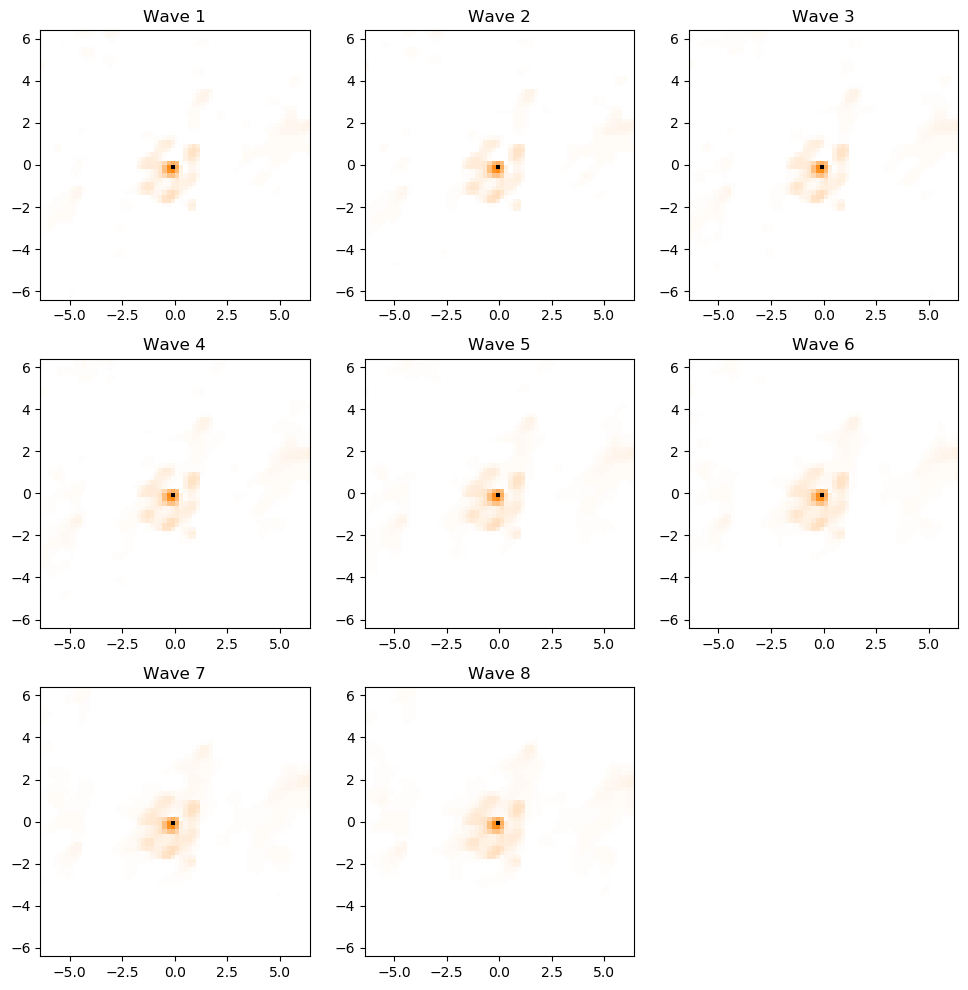

In [75]:
imdisp_polychromatic(reshape(x,nx*nx,nwav).^.7, pixscale=pixsize, colormap = "gist_heat_r")